[By:](https://www.linkedin.com/in/leo-hernandez-datasciencee/) R Leonardo Hernandez C

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving funcion_periodica.txt to funcion_periodica (4).txt


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Lee los datos del archivo .txt
data = np.loadtxt('funcion_periodica.txt', delimiter='\t')  # Ajusta el delimitador si es diferente

# Separa los valores de "x" y "f(x)" en arrays
x = data[:, 0]
f_x = data[:, 1]

def calcular_coeficientes(x, f_x, num_terminos, periodo):
    # Coeficiente a_0 (término constante)
    a_0 = np.trapz(f_x, x) * 2 / periodo

    # Coeficientes a_n y b_n para n = 1, 2, ..., num_terminos
    a_n = np.zeros(num_terminos)
    b_n = np.zeros(num_terminos)

    omega = 2 * np.pi / periodo

    for n in range(1, num_terminos + 1):
        a_n[n - 1] = np.trapz(f_x * np.cos(n * omega * x), x) * 2 / periodo
        b_n[n - 1] = np.trapz(f_x * np.sin(n * omega * x), x) * 2 / periodo

    return a_0, a_n, b_n

def generar_funcion_periodica(x, f_x, a_0, a_n, b_n, num_terminos, filename):
    # Calcula la función periódica aproximada mediante la serie de Fourier
    f_x_aproximada = a_0 / 2  # Inicializar con el término constante a_0

    for n in range(1, num_terminos + 1):
        f_x_aproximada += a_n[n - 1] * np.cos(2 * np.pi * n * x / periodo) + b_n[n - 1] * np.sin(2 * np.pi * n * x / periodo)

    # Guarda los resultados en un archivo .txt
    data_aproximada = np.column_stack((x, f_x, f_x_aproximada))  # Combinar x, f_x y f_x_aproximada en una matriz
    np.savetxt(filename, data_aproximada, delimiter='\t')

# Parámetros para la función periódica
periodo = 10   # Tamaño del período
num_terminos = 10  # Número de términos en la serie de Fourier
output_filename = 'funcion_periodica_aproximada.txt'  # Nombre del archivo de salida

# Calcular los coeficientes a_0, a_n y b_n
a_0, a_n, b_n = calcular_coeficientes(x, f_x, num_terminos, periodo)

# Generar y guardar la función periódica aproximada mediante la serie de Fourier
generar_funcion_periodica(x, f_x, a_0, a_n, b_n, num_terminos, output_filename)

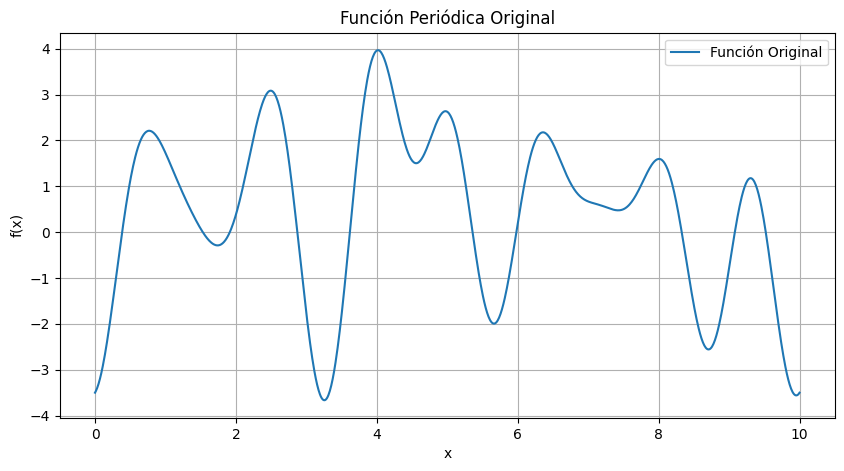

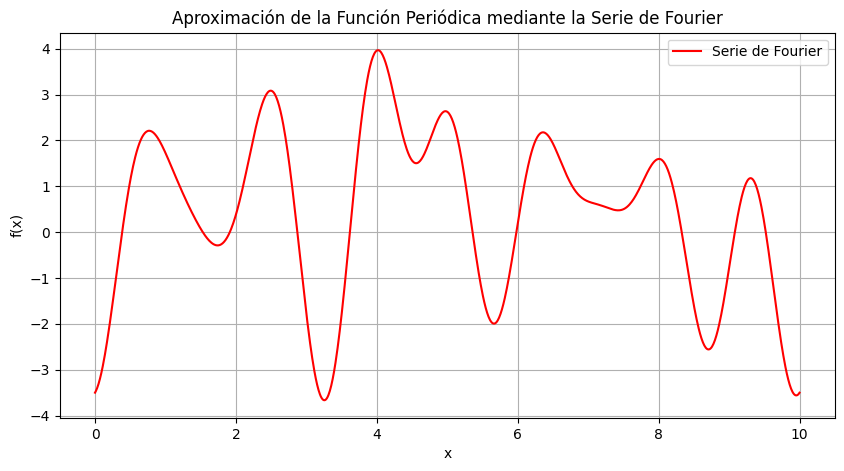

In [18]:
# 1. Graficar la función original
plt.figure(figsize=(10, 5))
plt.plot(x, f_x, label='Función Original')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función Periódica Original')
plt.grid(True)
plt.legend()
plt.show()

# 2. Graficar la serie de Fourier
def serie_fourier(x, a_0, a_n, b_n, periodo, num_terminos):
    f_x_aproximada = a_0 / 2

    for n in range(1, num_terminos + 1):
        f_x_aproximada += a_n[n - 1] * np.cos(2 * np.pi * n * x / periodo) + b_n[n - 1] * np.sin(2 * np.pi * n * x / periodo)

    return f_x_aproximada

x_serie = np.linspace(0, periodo, 1000)
f_x_serie = serie_fourier(x_serie, a_0, a_n, b_n, periodo, num_terminos)

plt.figure(figsize=(10, 5))
plt.plot(x_serie, f_x_serie,color='red', label='Serie de Fourier')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Aproximación de la Función Periódica mediante la Serie de Fourier')
plt.grid(True)
plt.legend()
plt.show()

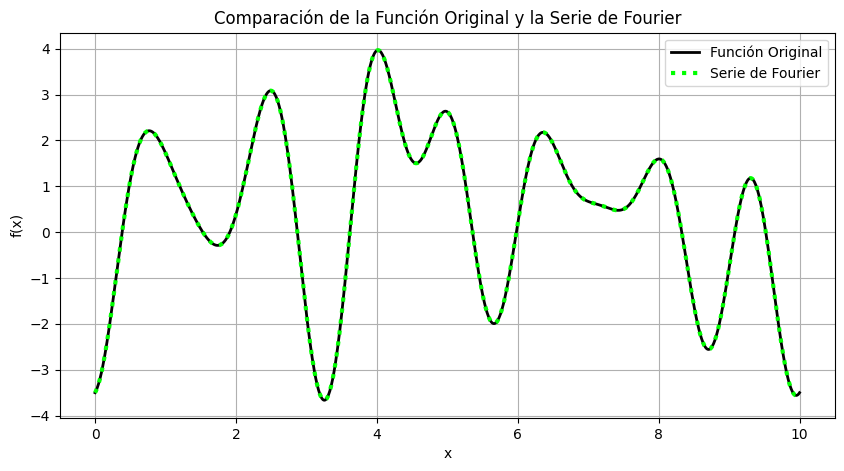

In [42]:
# 3. Graficar la función original y la serie sobre puestas en una sola gráfica
plt.figure(figsize=(10, 5))
plt.plot(x, f_x, label='Función Original', color='black', linestyle='-', linewidth=2)  # Línea sólida
plt.plot(x_serie, f_x_serie, label='Serie de Fourier', color='lime', linestyle='dotted', linewidth=3)  # Línea punteada
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Comparación de la Función Original y la Serie de Fourier')
plt.grid(True)
plt.legend()
plt.show()

<ipython-input-17-953534412c94>:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frecuencias, amplitudes, basefmt='C0-', linefmt='C0-', markerfmt='C0o', use_line_collection=True)


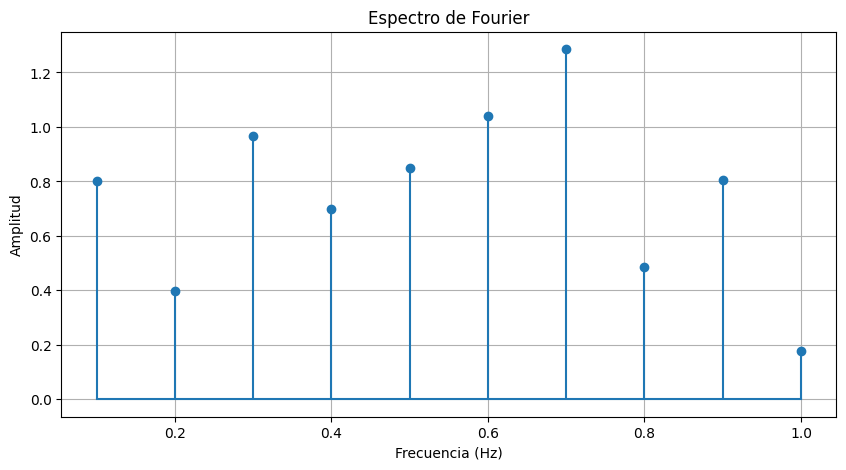

In [17]:
# 4. Calcular y graficar el espectro de Fourier
frecuencias = np.arange(1, num_terminos + 1) / periodo
amplitudes = np.sqrt(a_n**2 + b_n**2)

plt.figure(figsize=(10, 5))
plt.stem(frecuencias, amplitudes, basefmt='C0-', linefmt='C0-', markerfmt='C0o', use_line_collection=True)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de Fourier')
plt.grid(True)
plt.show()

In [13]:
# Calcular y guardar los datos de la serie de Fourier en un vector
f_x_serie = serie_fourier(x_serie, a_0, a_n, b_n, periodo, num_terminos)
serie_fourier_data = np.column_stack((x_serie, f_x_serie))  # Combinar x_serie y f_x_serie en una matriz

# Guardar los datos en un archivo .txt
serie_fourier_filename = 'serie_fourier_data.txt'
np.savetxt(serie_fourier_filename, serie_fourier_data, delimiter='\t')

# Imprimir los datos de la serie de Fourier
print("Datos de la Serie de Fourier:")
print(serie_fourier_data)


Datos de la Serie de Fourier:
[[ 0.         -3.50136106]
 [ 0.01001001 -3.4734504 ]
 [ 0.02002002 -3.44031769]
 ...
 [ 9.97997998 -3.54124225]
 [ 9.98998999 -3.52397829]
 [10.         -3.50136106]]


In [14]:
# Calcular y guardar los datos del espectro de Fourier en una matriz
espectro_fourier_data = np.column_stack((frecuencias, amplitudes))  # Combinar frecuencias y amplitudes en una matriz

# Guardar los datos en un archivo .txt
espectro_fourier_filename = 'espectro_fourier_data.txt'
np.savetxt(espectro_fourier_filename, espectro_fourier_data, delimiter='\t')

# Imprimir los datos del espectro de Fourier
print("Datos del Espectro de Fourier:")
print(espectro_fourier_data)


Datos del Espectro de Fourier:
[[0.1        0.80217921]
 [0.2        0.39874461]
 [0.3        0.96707952]
 [0.4        0.69881394]
 [0.5        0.84853784]
 [0.6        1.03984972]
 [0.7        1.28548693]
 [0.8        0.48417922]
 [0.9        0.80690563]
 [1.         0.17671098]]


Del espectro de Fourier calculado, se puede interpretar lo siguiente:

1. El espectro de Fourier muestra las amplitudes de las diferentes frecuencias que componen la función periódica analizada. Cada fila representa una frecuencia específica (expresada en Hz) y su correspondiente amplitud.

1. La primera columna corresponde a las frecuencias (f) y va desde 0.1 hasta 1.0 en incrementos de 0.1. Estas frecuencias están relacionadas con los armónicos que forman la función periódica.

1. La segunda columna muestra las amplitudes de cada una de las frecuencias. Estas amplitudes representan la contribución de cada frecuencia al contenido espectral de la función periódica.

1. Observamos que las amplitudes varían para diferentes frecuencias. Algunas frecuencias tienen amplitudes relativamente altas (por ejemplo, cerca de 1.0), lo que significa que esos armónicos tienen una gran influencia en la forma de la función periódica.

1. Otras frecuencias tienen amplitudes más bajas (por ejemplo, cercanas a 0.2 o 0.4), lo que indica que esos armónicos tienen una contribución menor al contenido espectral de la función periódica.

1. La frecuencia más baja (f = 0.1) tiene una amplitud de aproximadamente 0.80, lo que sugiere que el componente de frecuencia fundamental (primer armónico) es significativo en la función periódica.

1. El espectro de Fourier proporciona información sobre las frecuencias que componen la función periódica y cómo contribuyen a su forma. La presencia de diferentes frecuencias en el espectro es lo que permite descomponer la función periódica en su representación armónica mediante la Serie de Fourier.

En resumen, el espectro de Fourier te muestra cómo se descompone la función periódica en sus diferentes componentes frecuenciales (armónicos), lo que permite analizar su estructura y comprender cómo está formada en términos de sus diferentes frecuencias.


Para aplicar la Transformada de Fourier Discreta (DFT por sus siglas en inglés) a una señal discreta, como los datos de la función periódica que tienes, puedes utilizar la librería numpy de Python, ya que proporciona una implementación eficiente de la DFT a través de la función np.fft.fft().

La DFT toma una señal discreta de N puntos y calcula su representación en el dominio de frecuencia, es decir, los coeficientes de las diferentes frecuencias presentes en la señal. La transformada se realiza en una secuencia de N valores complejos.

Aquí está el código para calcular y graficar el espectro de Fourier usando la DFT:

<ipython-input-48-b2aadee70a6d>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frecuencias, amplitudes, basefmt='C0-', linefmt='C0-', markerfmt='C0o', use_line_collection=True)


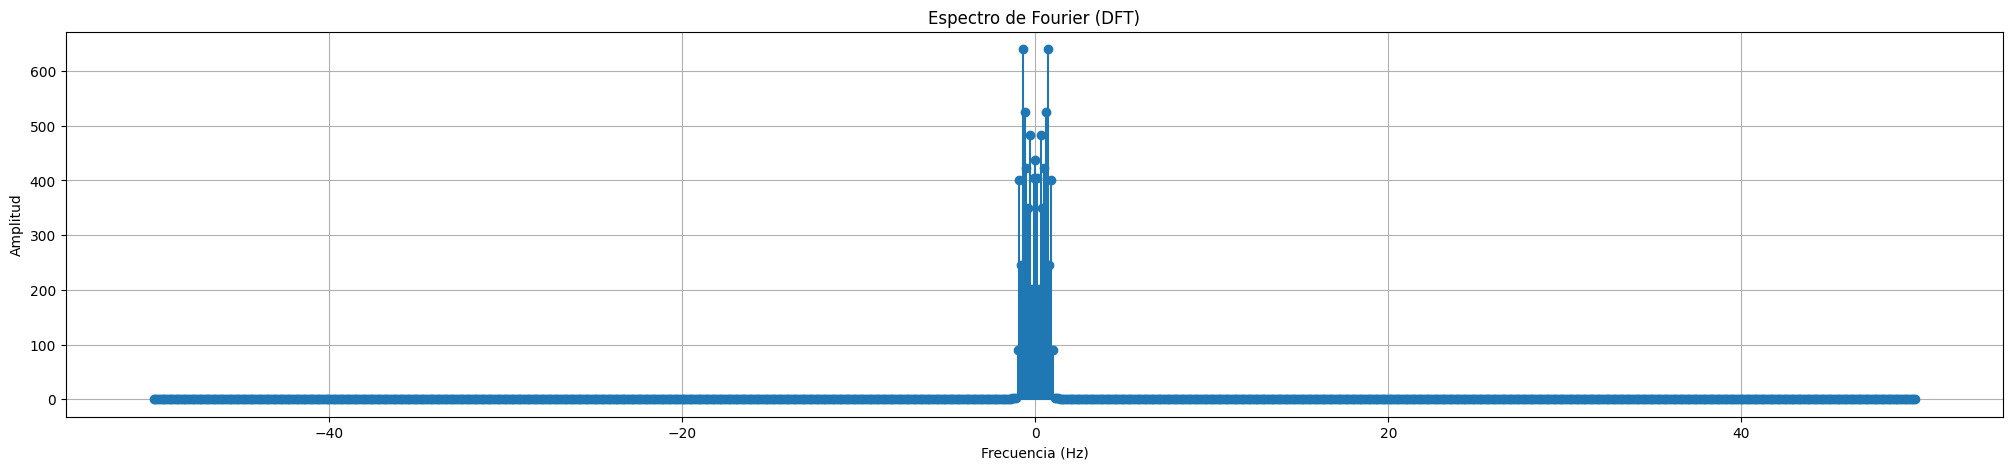

In [48]:
# Lee los datos del archivo .txt
data = np.loadtxt('funcion_periodica.txt', delimiter='\t')  # Ajusta el delimitador si es diferente

# Separa los valores de "x" y "f(x)" en arrays
x = data[:, 0]
f_x = data[:, 1]

# Aplicar la Transformada de Fourier Discreta (DFT)
dft_result = np.fft.fft(f_x)

# Obtener las amplitudes del espectro de Fourier (valores absolutos de los coeficientes)
amplitudes = np.abs(dft_result)

# Calcular las frecuencias correspondientes al espectro
N = len(f_x)
frecuencias = np.fft.fftfreq(N, d=(x[1] - x[0]))

# Graficar el espectro de Fourier
plt.figure(figsize=(25, 5))
plt.stem(frecuencias, amplitudes, basefmt='C0-', linefmt='C0-', markerfmt='C0o', use_line_collection=True)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de Fourier (DFT)')
plt.grid(True)
plt.show()

En este código, np.fft.fft(f_x) calcula la DFT de la señal f_x, y np.abs(dft_result) obtiene las amplitudes del espectro de Fourier. Las frecuencias correspondientes se obtienen mediante np.fft.fftfreq(N, d=(x[1] - x[0])), donde N es el número de puntos en la señal f_x y d es el intervalo entre los puntos.

La función plt.stem() se utiliza para graficar el espectro de Fourier como un gráfico de tallo (o gráfico de barras) para visualizar claramente las amplitudes en diferentes frecuencias.

El espectro de Fourier así obtenido te mostrará las amplitudes de las diferentes frecuencias presentes en la señal discreta.